# Introduction to the JupyterLab and Jupyter Notebooks

This is a short introduction to two of the flagship tools created by [the Jupyter Community](https://jupyter.org).

> **⚠️Experimental!⚠️**: This is an experimental interface provided by the [JupyterLite project](https://jupyterlite.readthedocs.io/en/latest/). It embeds an entire JupyterLab interface, with many popular packages for scientific computing, in your browser. There may be minor differences in behavior between JupyterLite and the JupyterLab you install locally. You may also encounter some bugs or unexpected behavior. To report any issues, or to get involved with the JupyterLite project, see [the JupyterLite repository](https://github.com/jupyterlite/jupyterlite/issues?q=is%3Aissue+is%3Aopen+sort%3Aupdated-desc).

## JupyterLab 🧪

**JupyterLab** is a next-generation web-based user interface for Project Jupyter. It enables you to work with documents and activities such as Jupyter notebooks, text editors, terminals, and custom components in a flexible, integrated, and extensible manner. It is the interface that you're looking at right now.

**For an overview of the JupyterLab interface**, see the **JupyterLab Welcome Tour** on this page, by going to `Help -> Welcome Tour` and following the prompts.

> **See Also**: For a more in-depth tour of JupyterLab with a full environment that runs in the cloud, see [the JupyterLab introduction on Binder](https://mybinder.org/v2/gh/jupyterlab/jupyterlab-demo/HEAD?urlpath=lab/tree/demo).

## Jupyter Notebooks 📓

**Jupyter Notebooks** are a community standard for communicating and performing interactive computing. They are a document that blends computations, outputs, explanatory text, mathematics, images, and rich media representations of objects.

JupyterLab is one interface used to create and interact with Jupyter Notebooks.

**For an overview of Jupyter Notebooks**, see the **JupyterLab Welcome Tour** on this page, by going to `Help -> Notebook Tour` and following the prompts.

> **See Also**: For a more in-depth tour of Jupyter Notebooks and the Classic Jupyter Notebook interface, see [the Jupyter Notebook IPython tutorial on Binder](https://mybinder.org/v2/gh/ipython/ipython-in-depth/HEAD?urlpath=tree/binder/Index.ipynb).

## An example: visualizing data in the notebook ✨

Below is an example of a code cell. We'll visualize some simple data using two popular packages in Python. We'll use [NumPy](https://numpy.org/) to create some random data, and [Matplotlib](https://matplotlib.org) to visualize it.

Note how the code and the results of running the code are bundled together.

Skipping corrupt or unreadable cat image: Task3/Cat/dataset - cannot identify image file 'Task3/Cat/dataset'
Shape of images array: (191, 128, 128, 3)
[[14  7]
 [10  8]]
              precision    recall  f1-score   support

           0       0.58      0.67      0.62        21
           1       0.53      0.44      0.48        18

    accuracy                           0.56        39
   macro avg       0.56      0.56      0.55        39
weighted avg       0.56      0.56      0.56        39



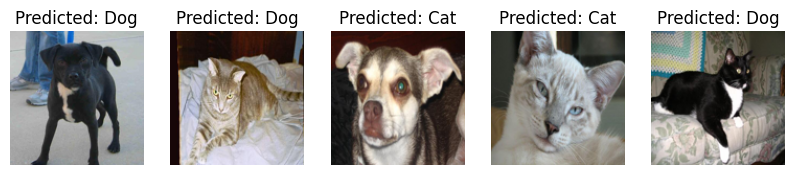

In [3]:
import os
import numpy as np
from PIL import Image
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt

# Define paths to your dataset
cat_path = 'Task3/Cat/'  # Adjust this path as needed
dog_path = 'Task3/Dog/'  # Adjust this path as needed

# Check if directories exist
if not os.path.exists(cat_path):
    print(f"Cat images directory does not exist: {cat_path}")
if not os.path.exists(dog_path):
    print(f"Dog images directory does not exist: {dog_path}")

# Load images and labels using Pillow
def load_images_and_labels(cat_path, dog_path):
    images = []
    labels = []
    
    # Load cat images
    for img in os.listdir(cat_path):
        img_path = os.path.join(cat_path, img)
        try:
            image = Image.open(img_path)
            image = image.resize((128, 128))  # Resize to 128x128
            image = np.array(image)  # Convert to NumPy array
            
            # Ensure the image has 3 channels (RGB)
            if len(image.shape) == 3 and image.shape[2] == 3:
                images.append(image)
                labels.append(0)  # 0 for cat
            else:
                print(f"Skipping non-RGB cat image: {img_path}")
                
        except Exception as e:
            print(f"Skipping corrupt or unreadable cat image: {img_path} - {e}")

    # Load dog images
    for img in os.listdir(dog_path):
        img_path = os.path.join(dog_path, img)
        try:
            image = Image.open(img_path)
            image = image.resize((128, 128))  # Resize to 128x128
            image = np.array(image)  # Convert to NumPy array

            # Ensure the image has 3 channels (RGB)
            if len(image.shape) == 3 and image.shape[2] == 3:
                images.append(image)
                labels.append(1)  # 1 for dog
            else:
                print(f"Skipping non-RGB dog image: {img_path}")

        except Exception as e:
            print(f"Skipping corrupt or unreadable dog image: {img_path} - {e}")

    # Convert lists to NumPy arrays
    images_array = np.array(images)
    labels_array = np.array(labels)

    # Check the shape of the images array
    print("Shape of images array:", images_array.shape)

    return images_array, labels_array

# If directories exist, proceed to load images
if os.path.exists(cat_path) and os.path.exists(dog_path):
    images, labels = load_images_and_labels(cat_path, dog_path)
    
    if images.size > 0:  # Check if images array is not empty
        # Flatten the images for SVM
        num_samples, img_height, img_width, num_channels = images.shape
        X = images.reshape(num_samples, img_height * img_width * num_channels)

        # Split the data into training and testing sets
        X_train, X_test, y_train, y_test = train_test_split(X, labels, test_size=0.2, random_state=42)

        # Create the SVM model
        svm_model = SVC(kernel='linear')  # You can also try 'rbf', 'poly', etc.
        svm_model.fit(X_train, y_train)

        # Make predictions
        y_pred = svm_model.predict(X_test)

        # Evaluate the model
        print(confusion_matrix(y_test, y_pred))
        print(classification_report(y_test, y_pred))

        # Optional: Visualize some predictions
        def visualize_predictions(X_test, y_test, y_pred, num_images=5):
            plt.figure(figsize=(10, 5))
            for i in range(num_images):
                plt.subplot(1, num_images, i + 1)
                plt.imshow(X_test[i].reshape(img_height, img_width, num_channels))
                plt.title('Predicted: ' + ('Dog' if y_pred[i] == 1 else 'Cat'))
                plt.axis('off')
            plt.show()

        visualize_predictions(X_test, y_test, y_pred)
    else:
        print("No valid images loaded.")
else:
    print("Make sure both Cat and Dog directories exist.")

## Next steps 🏃

This is just a short introduction to JupyterLab and Jupyter Notebooks. See below for some more ways to interact with tools in the Jupyter ecosystem, and its community.

### Other notebooks in this demo

Here are some other notebooks in this demo. Each of the items below corresponds to a file or folder in the **file browser to the left**.

- [**`Lorenz.ipynb`**](Lorenz.ipynb) uses Python to demonstrate interactive visualizations and computations around the [Lorenz system](https://en.wikipedia.org/wiki/Lorenz_system). It shows off basic Python functionality, including more visualizations, data structures, and scientific computing libraries.
- [**`r.ipynb`**](r.ipynb) demonstrates the R programming language for statistical computing and data analysis.
- [**`sqlite.ipynb`**](sqlite.ipynb) demonstrates how an in-browser sqlite kernel to run your own SQL commands from the notebook. It uses the [jupyterlite/xeus-sqlite-kernel](https://github.com/jupyterlite/xeus-sqlite-kernel).

### Other sources of information in Jupyter

- **More on using JupyterLab**: See [the JupyterLab documentation](https://jupyterlab.readthedocs.io/en/stable/) for more thorough information about how to install and use JupyterLab.
- **More interactive demos**: See [try.jupyter.org](https://try.jupyter.org) for more interactive demos with the Jupyter ecosystem.
- **Learn more about Jupyter**: See [the Jupyter community documentation](https://docs.jupyter.org) to learn more about the project, its community and tools, and how to get involved.
- **Join our discussions**: The [Jupyter Community Forum](https://discourse.jupyter.org) is a place where many in the Jupyter community ask questions, help one another, and discuss issues around interactive computing and our ecosystem.